In [ ]:
import pickle as pkl
import pk_plot_library as pplib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy
from figrid.data_container import DataContainer

pplib.imports()

In [74]:
ds = pkl.load(open('/Users/cosinga/code/hcolor/fig_md_analysis/5-8_pkdatasort.pkl', 'rb'))
print(ds.getAttrs())

ds.tickArgs(direction = 'in', right = True, top = True, labelsize = 14)
ds.legendArgs(frameon = False, loc = 'upper right', fontsize = 14, slc = (-1, -1))

ds.axisLabelArgs('both', fontsize = 16)
ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 16, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 16, ha = 'center' , va = 'top')
ds.axisArgs(xscale = 'log', yscale = 'log', xlim = [0.04, 20])

ds.setOrder('space', ['real', 'redshift', 'rsd'])

ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('snapshot', [99, 67, 50], ['z = 0.0', 'z = 0.5', 'z = 1.0'])
# ds.displayAs('color', ['blue', 'red', 'resolved'], 
#              ['HI $\\times$ Blue Bias', 'HI $\\times$ Red Bias', 'HI $\\times$ Galaxy Bias'])
ds.displayAs('HI_fieldname', ['hisubhalo', 'vn', 'hiptl'], ['Galaxy Centers', 'All Particles', 'Particles in Galaxies'])

ds.setColors('HI_fieldname', ['firebrick', 'saddlebrown', 'sandybrown'], ['vn', 'hiptl', 'hisubhalo'])
ds.setColors('color', ['red', 'blue', 'gray'], ['red', 'blue', 'resolved'])

ds.setXLabel(pplib.wnum())
ds.getAttrVals('post_process')

['path', 'result_type', 'result_runtime', 'is_auto', 'box', 'simname', 'sim_resolution', 'num_part', 'grid_resolution', 'snapshot', 'redshift', 'axis', 'fieldname', 'is_hydrogen', 'is_atomic', 'is_molecular', 'is_particle', 'is_groupcat', 'is_matter', 'mas', 'space', 'compute_xi', 'compute_slice', 'color', 'gal_species', 'gal_res', 'color_cut', 'ptl_species', 'map', 'model', 'HI_fieldname', 'projection', 'HI_res', 'censat', 'post_process', 'numerator', 'denominator']


['no key found', 'theory_bias', 'obs_bias', 'corr_coef']

In [75]:
def calc_obs_bias(ip):
    ptlip = {'is_auto':True, 'fieldname':'ptl', 'ptl_species':'ptl', 'mas':ip['mas'],
            'path':ip['path'], 'grid_resolution':ip['grid_resolution'],
            'simname':ip['simname'], 'axis':0, 'snapshot':ip['snapshot'],
            'space':ip['space']}
    ptl_auto = ds.getMatching(ptlip)
    if len(ptl_auto) > 1:
        for i in ptl_auto:
            print(i.attrs)
    
    ptl_auto = ptl_auto[0]
    
    auto = ds.getMatching(ip)
    biases = []
    for i in range(len(auto)):
        
        data = [auto[i].data[0], np.sqrt(auto[i].data[1] / ptl_auto.data[1])]
        dc = DataContainer(data)
        dc.update(copy.deepcopy(auto[i].attrs))
        dc.add('post_process','obs_bias')
        dc.add('is_auto', False)
        dc.add('denominator', 'ptl')
        biases.append(dc)
    return biases
    

In [78]:
simnames = ['tng100', 'tng300']
snapshots = [50, 67, 99]
spaces = ['real', 'redshift']

for name in simnames:
    for snap in snapshots:
        for space in spaces:
            
            if not (snap == 67 and name == 'tng300'):
                print("\n", name, snap, space)
                hiip = {'is_auto':True, "HI_fieldname":['vn', 'hiptl'],      
                  'axis':0, 'grid_resolution':800, 'simname': name,
                  'mas':'CICW', 'snapshot':snap, 'space':space,
                 'path':'fiducial', 'post_process':'no key found'}
                obs_biases = calc_obs_bias(hiip)
                print('hi biases:', len(obs_biases))
                ds.extend(obs_biases)

                galip = {'gal_res':'diemer',
                          'gal_species':'stmass', 'sim_resolution':'high', 
                         'axis':0, 'grid_resolution':800,
                          'censat':['no key found', 'both'], 'mas':'CICW', 
                         'color': ['blue', 'red', 'resolved'], 'fieldname':'galaxy',
                         'path':'fiducial', 'simname':name, 'space':space,
                        'snapshot':snap, 'post_process':'no key found'}
                obs_biases = calc_obs_bias(galip)
                print('galaxy biases:', len(obs_biases))
                print(obs_biases[0].attrs)
                ds.extend(obs_biases)


 tng100 50 real
hi biases: 5
galaxy biases: 3
{'path': 'fiducial', 'result_type': 'pk', 'result_runtime': 24.09369921684265, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 50, 'redshift': 0.9972942257819404, 'axis': 0, 'fieldname': 'galaxy', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': True, 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.50', 'censat': 'both', 'post_process': 'obs_bias', 'denominator': 'ptl'}

 tng100 50 redshift
hi biases: 5
galaxy biases: 3
{'path': 'fiducial', 'result_type': 'pk', 'result_runtime': 24.08233118057251, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 50, 'redshift': 0.9972942257819404, 'axis':

galaxy biases: 3
{'path': 'fiducial', 'result_type': 'pk', 'result_runtime': 24.191209316253662, 'is_auto': False, 'box': 205.0, 'simname': 'tng300', 'sim_resolution': 'high', 'num_part': 2740098112, 'grid_resolution': 800, 'snapshot': 50, 'redshift': 0.9972942257819404, 'axis': 0, 'fieldname': 'galaxy', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': True, 'mas': 'CICW', 'space': 'redshift', 'compute_xi': True, 'compute_slice': False, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.50', 'censat': 'both', 'post_process': 'obs_bias', 'denominator': 'ptl'}

 tng300 99 real
hi biases: 5
galaxy biases: 3
{'path': 'fiducial', 'result_type': 'pk', 'result_runtime': 44.95251798629761, 'is_auto': False, 'box': 205.0, 'simname': 'tng300', 'sim_resolution': 'high', 'num_part': 2740098112, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'galaxy

The row values for post_process: ['obs_bias']
The column values for snapshot: [99, 67, 50]


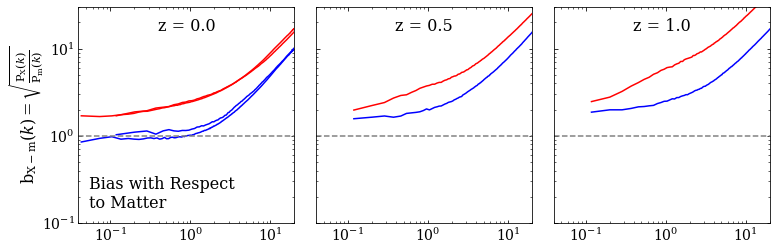

In [77]:
ip = {'is_auto':False, 
      'axis':0, 'grid_resolution':800, 'simname': ['tng100', 'tng300'], 'gal_res':'diemer',
      'gal_species':'stmass', 'ptl_species':'ptl',
      'censat':['no key found', 'both'], 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
      'post_process':['obs_bias'], 'snapshot':[99, 67, 50], 'space':'real',
     'path':'fiducial', 'denominator':'ptl'}
gspec = {'wspace':0.1, 'xborder':[0.33, 0]}
ds.displayAs('color', ['blue', 'red', 'resolved'], 
             ['Blue Gal.', 'Red Gal.', 'All Gal.'])
bfg = ds.figrid("color", 'post_process', 'snapshot', ip)
fn = 'k'
name1 = '\\mathrm{X}'
name2 = '\\mathrm{m}'
obsbias = '$\\sqrt{\\frac{\\mathrm{P}_{%s} (%s)}{\\mathrm{P}_{%s} (%s)}}$'%(name1, fn, name2, fn)
thbias = '$\\frac{\\mathrm{P}_{%s \\times %s} (%s)}{\\mathrm{P}_{%s} (%s)}$'%(name1, name2, fn, name2, fn)


bfg.rowLabels(['Bias with Respect\nto Matter'])
bfg.gspecArgs(yborder = [0.05, 0.25], **gspec)
bfg.setDefaultTicksParams()
bfg.axisArgs(ylim = (.1, 30))
bfg.setYLabel(pplib.obsbiaslab('X', 'm'))
bfg.setXLabel('')
bfg.plotOnes()

bfg.legendArgs(rm_legend = True)
bfg.plot()

In [22]:
ds.printMatching({'simname':'tng300', 'path':'fiducial', 'snapshot':50, 'is_auto':True,
                 'fieldname':'galaxy_ptl', 'denominator':'ptl'})

In [17]:
ds.getAttrVals('fieldname')

['galaxy',
 'hiptl_ptl',
 'hiptl',
 'vn_galaxy',
 'hiptl_galaxy',
 'galaxy_dust',
 'vn_ptl',
 'vn',
 'ptl',
 'hisubhalo_ptl',
 'hisubhalo_galaxy',
 'hisubhalo',
 'galaxy_ptl',
 'hisubhalo_galaxy_dust']